# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate.

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters # register date convertors to avoid warning messages
import matplotlib.dates as mdates
import zipfile as zf

# Retrieve the data

In [3]:
files = zf.ZipFile("Google-Trends-Data.zip", 'r')
files.extractall("Google Trends Data")
files.close()

# Read the Data

In [7]:
tesla_df = pd.read_csv("Google Trends Data/Google Trends Data/TESLA Search Trend vs Price.csv")
btc_search_df = pd.read_csv("Google Trends Data/Google Trends Data/Bitcoin Search Trend.csv")
btc_price_df = pd.read_csv("Google Trends Data/Google Trends Data/Daily Bitcoin Price.csv")
unemployment_df = pd.read_csv("Google Trends Data/Google Trends Data/UE Benefits Search vs UE Rate 2004-20.csv")

# Data Exploration

## Tesla

In [11]:
tesla_df.shape

(124, 3)

In [12]:
tesla_df.columns

Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')

In [13]:
tesla_df["TSLA_WEB_SEARCH"].describe()

count    124.000000
mean       8.725806
std        5.870332
min        2.000000
25%        3.750000
50%        8.000000
75%       12.000000
max       31.000000
Name: TSLA_WEB_SEARCH, dtype: float64

In [14]:
tesla_df["MONTH"].nunique

<bound method IndexOpsMixin.nunique of 0      2010-06-01
1      2010-07-01
2      2010-08-01
3      2010-09-01
4      2010-10-01
          ...    
119    2020-05-01
120    2020-06-01
121    2020-07-01
122    2020-08-01
123    2020-09-01
Name: MONTH, Length: 124, dtype: object>

### Results

1. Shape of the DataFrame
>- (124, 3)
2. Number of rows and columns
>- 124 rows and 3 columns
3. What are the column names
>- 'MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'
4. What is the largest and smallest number in search data column?
>- Largest = 31.000
>- Smallest = 2.000
5. Periodicity of Time Series Data
>- Daily

## Unemployment Data

In [15]:
unemployment_df.shape

(200, 3)

In [16]:
unemployment_df.columns

Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')

In [17]:
unemployment_df["UE_BENEFITS_WEB_SEARCH"].describe()

count    200.000000
mean      10.315000
std       10.778061
min        4.000000
25%        5.000000
50%        7.000000
75%       12.000000
max      100.000000
Name: UE_BENEFITS_WEB_SEARCH, dtype: float64

In [18]:
unemployment_df["MONTH"].nunique

<bound method IndexOpsMixin.nunique of 0      2004-01
1      2004-02
2      2004-03
3      2004-04
4      2004-05
        ...   
195    2020-04
196    2020-05
197    2020-06
198    2020-07
199    2020-08
Name: MONTH, Length: 200, dtype: object>

### Results

1. Shape of the DataFrame
>- (200, 3)
2. Number of rows and columns
>- 200 rows and 3 columns
3. Name of the columns
>- 'MONTH', 'US_BENEFITS_WEB_SEARCH', 'UNRATE'
4. What is the largest and smallest number in search data column?
>- Largest = 100.000
>- Smallest = 4.000
5. Periodicity of Time Series Data
>- Monthly

## Bitcoin Search Trend Data

In [19]:
btc_search_df.shape

(73, 2)

In [20]:
btc_search_df.columns

Index(['MONTH', 'BTC_NEWS_SEARCH'], dtype='object')

In [21]:
print(btc_search_df["BTC_NEWS_SEARCH"].max())
print(btc_search_df["BTC_NEWS_SEARCH"].min())

100
3


In [22]:
btc_search_df.MONTH.nunique

<bound method IndexOpsMixin.nunique of 0     2014-09
1     2014-10
2     2014-11
3     2014-12
4     2015-01
       ...   
68    2020-05
69    2020-06
70    2020-07
71    2020-08
72    2020-09
Name: MONTH, Length: 73, dtype: object>

### Results

1. Shape of the DataFrame
>- (73,2)
2. Number of rows and columns in the DataFrame
>- 73 rows and 2 columns
3. Name of the columns
>- 'MONTH', 'BTC_NEWS_SEARCH'
4. What is the largest and smallest number in search data column?
>- Largest = 100
>- Smallest = 3
5. Periodicity of Time Series Data
>- Monthly

## Bitcoin Price Trend Data

In [23]:
btc_price_df.shape

(2204, 3)

In [24]:
btc_price_df.columns

Index(['DATE', 'CLOSE', 'VOLUME'], dtype='object')

In [25]:
btc_price_df["DATE"].nunique

<bound method IndexOpsMixin.nunique of 0       2014-09-17
1       2014-09-18
2       2014-09-19
3       2014-09-20
4       2014-09-21
           ...    
2199    2020-09-24
2200    2020-09-25
2201    2020-09-26
2202    2020-09-27
2203    2020-09-28
Name: DATE, Length: 2204, dtype: object>

### Results

1. Shape of the DataFrame
>- (2204, 3)
2. Number of Rows and Columns in the dataframe
>- 2204 rows and 3 columns
3. Name of the columns
>- 'DATE', 'CLOSE', 'VOLUME'
4. Periodicity of the Time Series Data
>- Daily

# Handling NaN values

## Tesla

In [26]:
print(tesla_df.isna().values.any())

False


### Result
There are no NaN values in Tesla DataFrame.

## Unemployment Data

In [27]:
unemployment_df.isna().values.any()

False

### Result
There are no NaN values in the Unemployment DataFrame.

## Bitcoin Search Trend DataFrame

In [28]:
btc_search_df.isna().values.any()

False

### Result
There are no NaN values in the Bitcoin Search Trend DataFrame

## Bitcoin Price Trend DataFrame

In [29]:
btc_price_df.isna().values.any()

True

In [30]:
btc_price_df.isna().values.sum()

2

In [31]:
btc_price_df[btc_price_df['CLOSE'].isna()]

,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


In [32]:
btc_price_df.dropna(inplace=True)

In [33]:
btc_price_df.isna().values.any()

False

### Result
NaN values were found in the DataFrame and were removed successfully.

# Datetime Objects

In [34]:
tesla_df.MONTH = pd.to_datetime(tesla_df.MONTH)

In [35]:
unemployment_df["MONTH"] = pd.to_datetime(unemployment_df.MONTH)

In [36]:
btc_search_df["MONTH"] = pd.to_datetime(btc_search_df["MONTH"])

In [37]:
btc_price_df.DATE = pd.to_datetime(btc_price_df.DATE)

# Resampling Data

Resampling bitcoin price data from daily to monthly data, where last price of a month is taken into consideration.

In [38]:
btc_monthly_df = btc_price_df.resample("M", on='DATE').last()
# If we wanted to take avg into consideration, then code would have been - btc_monthly_df = btc_price_df.resample("M", on='DATE').mean()

In [39]:
btc_monthly_df.head()

,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,34707300.0
2014-10-31,338.321014,12545400.0
2014-11-30,378.046997,9194440.0
2014-12-31,320.192993,13942900.0
2015-01-31,217.464005,23348200.0


# Data Visualisation

## Tesla

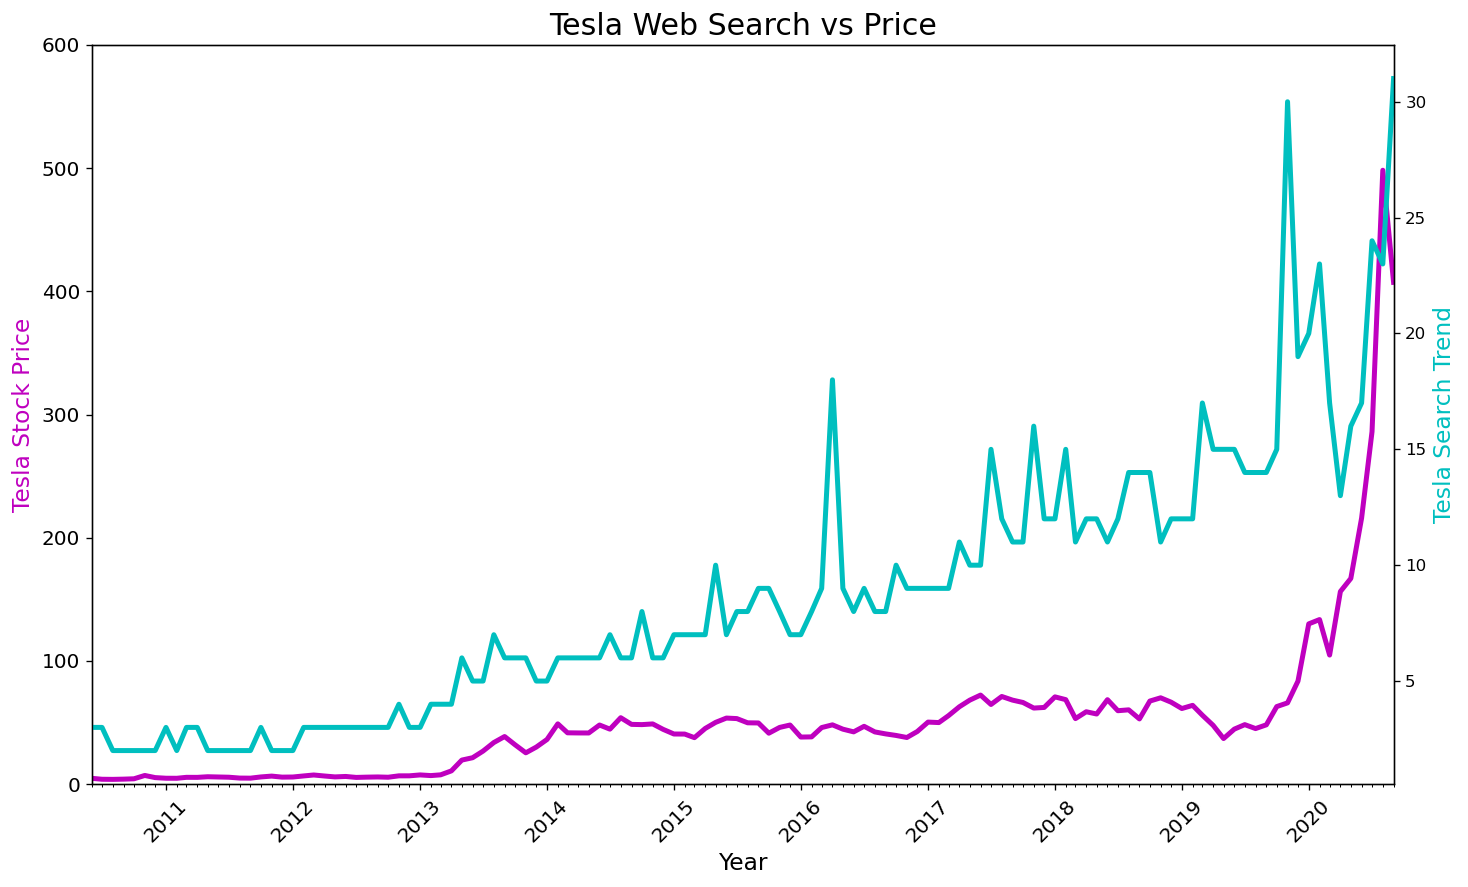

In [40]:
register_matplotlib_converters()


plt.figure(figsize=(14,8), dpi=120)
plt.title("Tesla Web Search vs Price", fontsize=18)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_xlabel("Year", fontsize=14)
ax1.set_ylabel("Tesla Stock Price", color="m", fontsize=14)
ax2.set_ylabel("Tesla Search Trend", color="c",fontsize=14)

ax1.set_ylim([0, 600])
ax1.set_xlim([tesla_df.MONTH.min(), tesla_df.MONTH.max()])

# create locators for tick marks on time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter("%Y")

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.plot(tesla_df.MONTH, tesla_df.TSLA_USD_CLOSE, color='m', linewidth=3)
ax2.plot(tesla_df.MONTH, tesla_df.TSLA_WEB_SEARCH, color="c", linewidth=3)

plt.show()

## Bitcoin

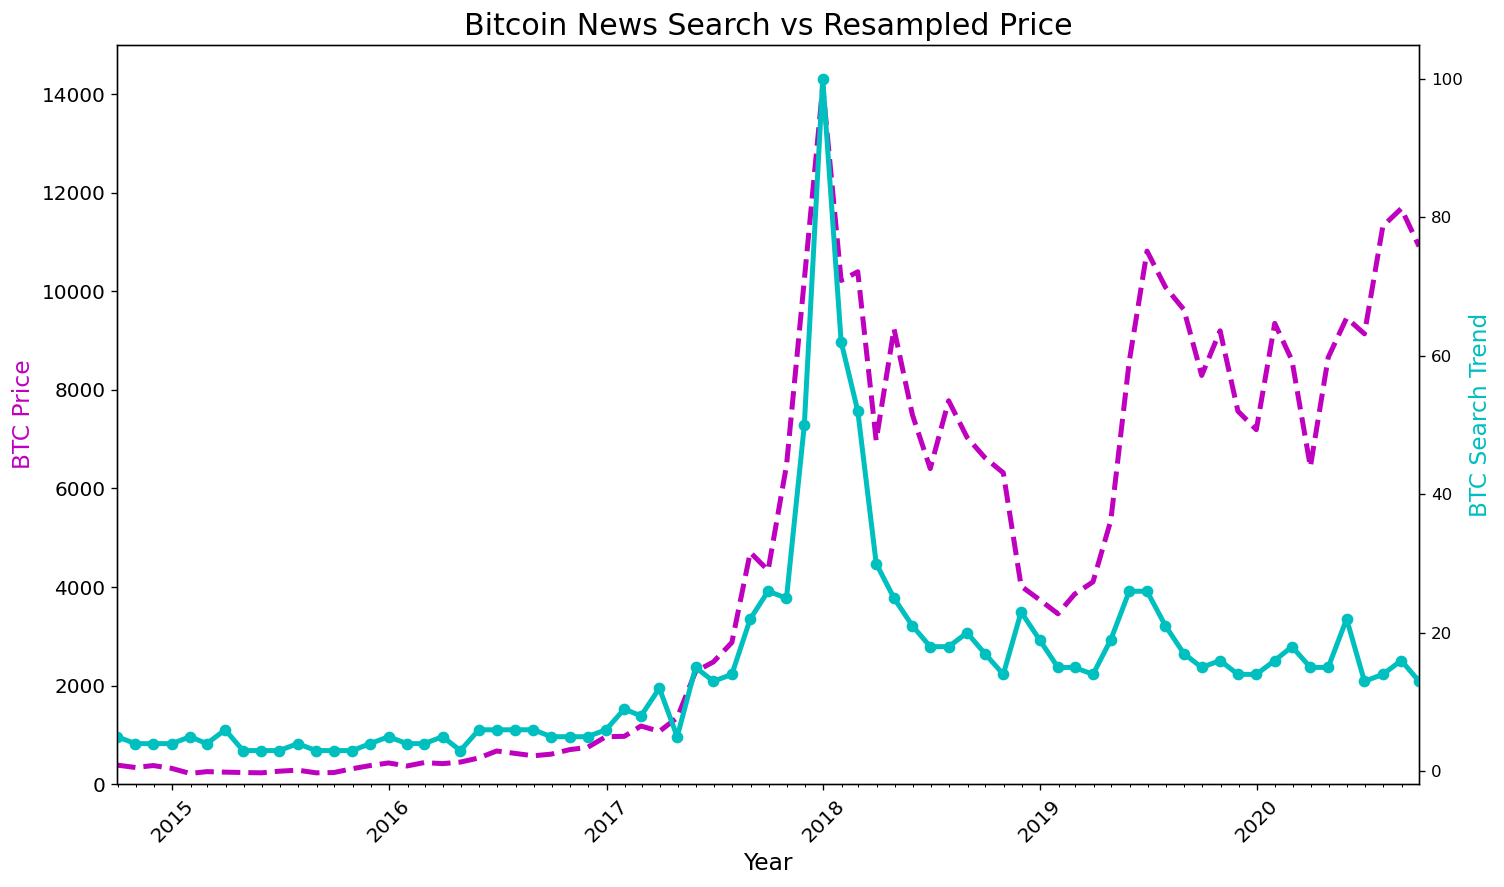

In [41]:
register_matplotlib_converters()

plt.figure(figsize=(14,8), dpi=120)
plt.title("Bitcoin News Search vs Resampled Price", fontsize=18)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_xlabel("Year", fontsize=14)
ax1.set_ylabel("BTC Price", color="m", fontsize=14)
ax2.set_ylabel("BTC Search Trend", color="c",fontsize=14)

ax1.set_ylim([0, 15000])
ax1.set_xlim([btc_monthly_df.index.min(), btc_monthly_df.index.max()])

# create locators for tick marks on time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter("%Y")

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.plot(btc_monthly_df.index, btc_monthly_df.CLOSE, color='m', linewidth=3, linestyle="dashed")
ax2.plot(btc_monthly_df.index, btc_search_df.BTC_NEWS_SEARCH, color="c", linewidth=3, marker= 'o')

plt.show()

## Unemployment Data

In [42]:
unemployment_df.columns

Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')

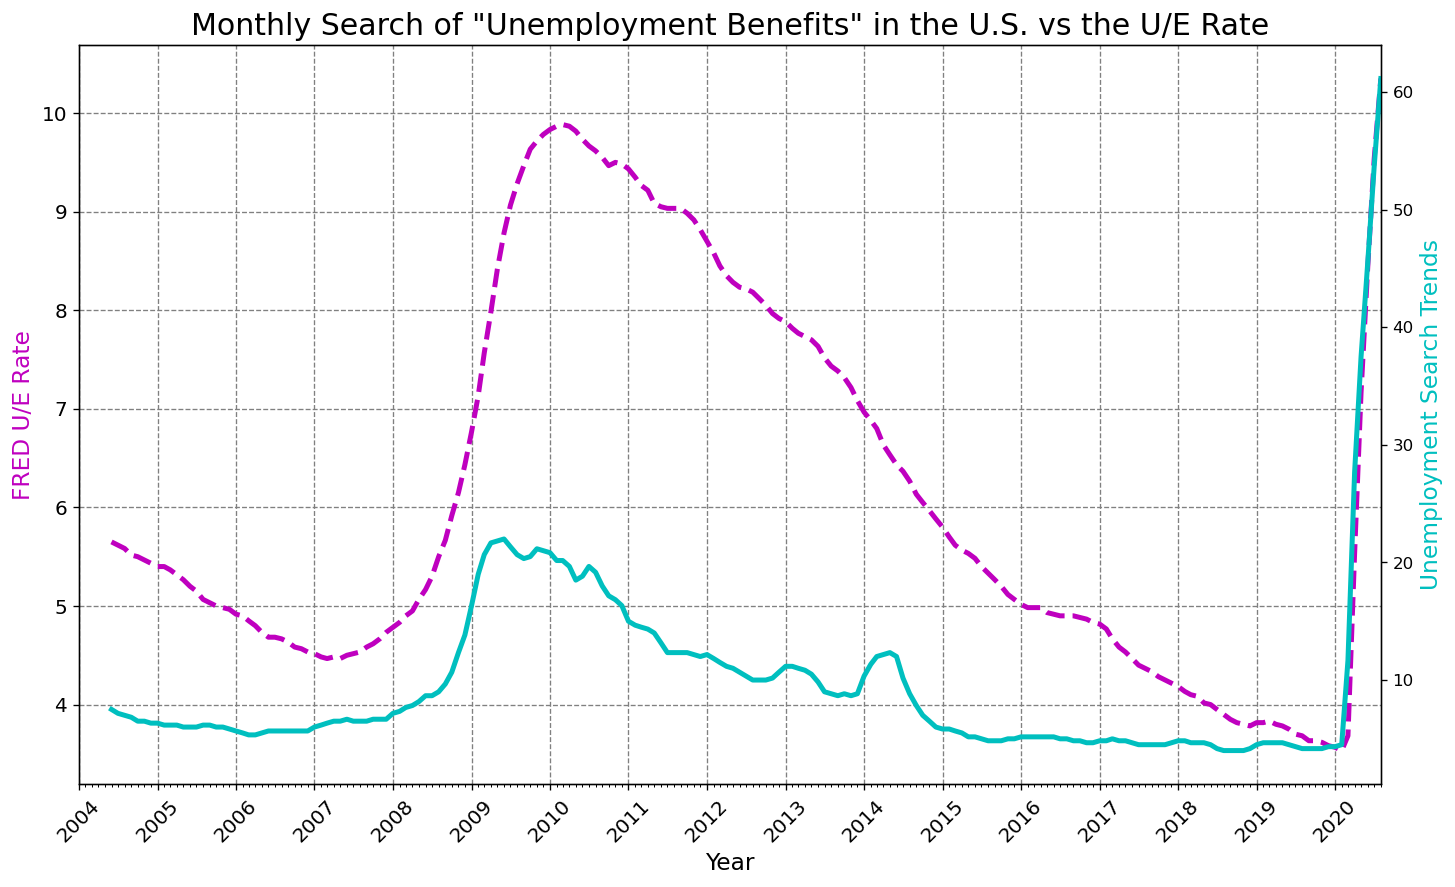

In [49]:
register_matplotlib_converters()

plt.figure(figsize=(14,8), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

plt.grid(visible=True, color="grey", linestyle="dashed")

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_xlabel("Year", fontsize=14)
ax1.set_ylabel("FRED U/E Rate", color="m", fontsize=14)
ax2.set_ylabel("Unemployment Search Trends", color="c",fontsize=14)

ax1.set_xlim([unemployment_df.MONTH.min(), unemployment_df.MONTH.max()])

# create locators for tick marks on time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter("%Y")

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

roll_df = unemployment_df[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

ax1.plot(unemployment_df.MONTH, roll_df.UNRATE, color='m', linewidth=3, linestyle="dashed")
ax2.plot(unemployment_df.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, color="c", linewidth=3)

plt.show()